# **NPV Mini-Project 1**

In [1]:
import numpy as np
import pandas as pd


In [4]:
health=pd.read_csv(r'C:\Users\notebook15\Desktop\GL\2.Numpy,Pandas and Visualization\NPV Project\emp_health.csv')
health

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


In [3]:
health.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [4]:
type(health)

pandas.core.frame.DataFrame

**Q 1. How many employees above 50 age smoke, what is their average expenditure on health management?**

In [6]:
ans1=health[(health['age']>50) & (health['smoke']=='yes')]
ans2=ans1.shape
print("Employees above age 50 and smoking are ",ans2[0])
ans3=ans1['expenditure'].mean()
print('The Average expenditure on health management of the employees who are above age 50 and smoking is :',ans3)

Employees above age 50 and smoking are  64
The Average expenditure on health management of the employees who are above age 50 and smoking is : 38820.22308234375


In [ ]:
x=health.groupby(['']).max()

**Q.2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?**

In [9]:

x=health[(health['sex']=='female') & (health['alcohol']!='daily')]
y=x.shape
print(" female employees did not consume alcohol daily are: ",y[0])                            

 female employees did not consume alcohol daily are:  453


In [19]:
z=health[(health['sex']=='female')]
a=z.shape
print("proportion of female employees did not consume alcohol daily  with respect to total female employees is ", y[0]/a[0])

proportion of female employees did not consume alcohol daily  with respect to total female employees is  0.6842900302114804


**Q.3. Display zone wise average expenditure of employees on health**

In [33]:
z_ex=pd.pivot_table(
    data=health,
    values='expenditure',
    index='zone',
    columns=None,
    aggfunc='mean',
    fill_value=None,
    margins=False,
    dropna=True,
    margins_name='All',
    observed=False,
)

print('The zone wise expenditure is as below:\n',z_ex)

The zone wise expenditure is as below:
             expenditure
zone                   
east       13774.679941
north      14102.583403
northeast  13694.721724
northwest  12151.702619
south      14715.689519
southeast  14452.949680
southwest  12717.083869
west       12182.998872


**Q.4.Employees of which zone did maximum expenditure on health**

In [49]:
z_ex=pd.pivot_table(
    data=health,
    values='expenditure',
    index='zone',
    columns=None,
    aggfunc='max',
    fill_value=None,
    margins=False,
    dropna=True,
    margins_name='All',
    observed=False,
)
print(z_ex)


print(z_ex.idxmax())
print(np.amax(z_ex))

           expenditure
zone                  
east       58571.07448
north      48549.17835
northeast  46255.11250
northwest  55135.40209
south      47055.53210
southeast  63770.42801
southwest  52590.82939
west       60021.39897
expenditure    southeast
dtype: object
expenditure    63770.42801
dtype: float64


**Q.5. What is the minimum expenditure done by any employee in organization**

In [54]:
id_ex=pd.pivot_table(
    data=health,
    values='expenditure',
    index='id',
    columns=None,
    aggfunc='min',
    fill_value=None,
    margins=False,
    dropna=True,
    margins_name='All',
    observed=False,
)
id_ex
print(id_ex.idxmin())
print(np.amin(id_ex))

expenditure    i10952
dtype: object
expenditure    1121.8739
dtype: float64


**Q.6.What is average expenditure of employees who have 2 or lesser dependents**

In [58]:
m=health.loc[:,['dependent','expenditure']]
n=m[m['dependent']<=2]['expenditure'].mean()
print('Average expenditure of employees who have 2 or lesser dependents are :',n)

Average expenditure of employees who have 2 or lesser dependents are : 13040.970970948145


**Q.7. How many employees are below age of 20 years. What is their average BMI**

In [62]:
age_20 =health['age'][health['age']<20].count()
print("No of employees who are below age 20 are :",age_20)
bmi_20=health.loc[:,['age','bmi']][health['age']<20]['bmi'].mean()
print('Average bmi of employees who are below age 20 are :',round(bmi_20))

No of employees who are below age 20 are : 137
Average bmi of employees who are below age 20 are : 30


In [66]:
xage20=pd.pivot_table(health,index=[health['age']<20],values='bmi',aggfunc='mean')
xage20

,bmi
age,
False,30.742323
True,29.971496


**8. Create a dataframe "non_smoker" for all non-smoker male employees**

In [84]:
sex_male=health.loc[(health.sex =='male') & (health.smoke=='no')]
non_smoker=sex_male.loc[:,['id','smoke']]
non_smoker

,id,smoke
1,i10013,no
2,i10014,no
3,i10015,no
4,i10016,no
8,i10020,no
...,...,...
1324,i11336,no
1325,i11337,no
1327,i11339,no
1329,i11341,no


**Q.9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol**

In [92]:
na=health.loc[(health.sex=='male') & (health.alcohol=='no')]
non_alcoholic=na.loc[:,['id','alcohol']]
non_alcoholic

,id,alcohol
18,i10030,no
24,i10036,no
28,i10040,no
37,i10049,no
38,i10050,no
...,...,...
1291,i11303,no
1301,i11313,no
1310,i11322,no
1320,i11332,no


**Q.10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol**

In [95]:
non_smoking_alcoholic=pd.merge(non_smoker,non_alcoholic,on='id',how='inner')
non_smoking_alcoholic

,id,smoke,alcohol
0,i10030,no,no
1,i10036,no,no
2,i10040,no,no
3,i10049,no,no
4,i10079,no,no
...,...,...,...
104,i11273,no,no
105,i11282,no,no
106,i11322,no,no
107,i11332,no,no


**.11.What is the count for each zone with respect to number of dependent**


In [98]:
no_d=pd.pivot_table(
    health,
    values='dependent',
    index='zone',
    columns=None,
    aggfunc='count',
    fill_value=None,
    margins=False,
    dropna=True,
    margins_name='All',
    observed=False,
)

no_d

,dependent
zone,
east,262
north,70
northeast,74
northwest,145
south,84
southeast,198
southwest,251
west,254


In [99]:
health['bmi_Category']= [ 'under_weight' if X<18.5 else 'over_weight' if X>24.9 else 'fit' for X in health.bmi ]
health

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure,bmi_Category
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400,over_weight
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230,over_weight
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200,over_weight
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061,fit
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520,over_weight
...,...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830,over_weight
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080,over_weight
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350,over_weight
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500,over_weight


**12.What is the average expenditure of employees in each category.
 Display the bar chart for the same**

In [101]:
bmi_cat_mean=pd.pivot_table(health,index='bmi_Category',values='expenditure',aggfunc='mean')
bmi_cat_mean

,expenditure
bmi_Category,
fit,10379.499732
over_weight,13936.616823
under_weight,8852.200585


In [2]:
from matplotlib import pyplot as plt

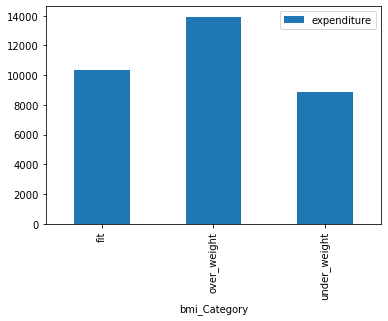

In [110]:
graph1 =bmi_cat_mean.plot.bar()

**13. Draw line plot of expenditure against age and BMI**

<AxesSubplot:xlabel='bmi', ylabel='expenditure'>

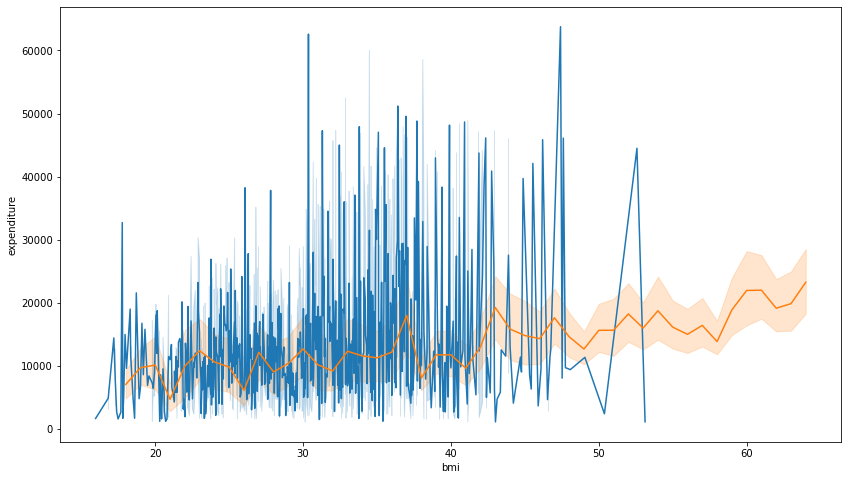

In [7]:
plt.figure(figsize=(14,8))
sns.lineplot(y=health['expenditure'],x=health['bmi'])
sns.lineplot(y=health['expenditure'],x=health['age'])

**14. Draw a bar chart to show zone wise average expenditure**

In [4]:
z_exb=pd.pivot_table(
    data=health,
    values='expenditure',
    index='zone',
    columns=None,
    aggfunc='mean',
    fill_value=None,
    margins=False,
    dropna=True,
    margins_name='All',
    observed=False,
)

print('The zone wise expenditure is as below:\n',z_exb)

The zone wise expenditure is as below:
             expenditure
zone                   
east       13774.679941
north      14102.583403
northeast  13694.721724
northwest  12151.702619
south      14715.689519
southeast  14452.949680
southwest  12717.083869
west       12182.998872


Text(0, 0.5, 'Average expenditure')

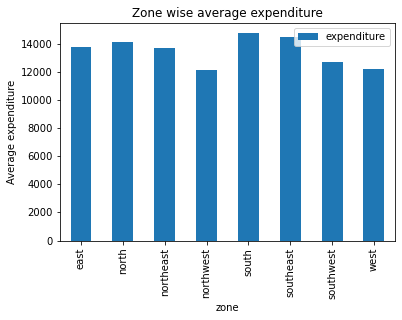

In [8]:
z_exb.plot.bar()

plt.title('Zone wise average expenditure')

plt.ylabel('Average expenditure')

**15. Draw a bar chart to show smoking and alcoholic habits against average expenditure**

In [3]:
import seaborn as sns

<AxesSubplot:xlabel='smoke', ylabel='expenditure'>

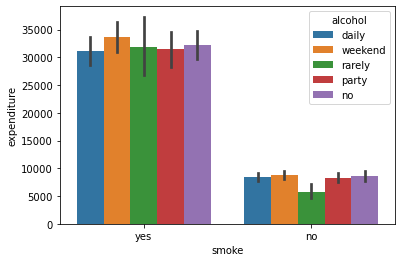

In [12]:
sns.barplot(data=health,x='smoke',y='expenditure',hue='alcohol')

<AxesSubplot:xlabel='alcohol', ylabel='expenditure'>

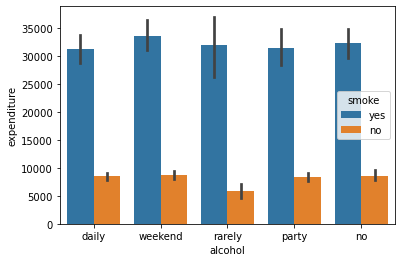

In [14]:
sns.barplot(data=health,x='alcohol',y='expenditure',hue='smoke')

**16. Draw pie chart for alcohol consumption habits**

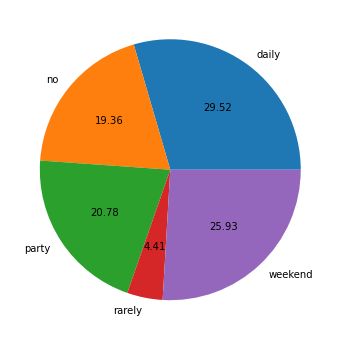

In [22]:
x=health.groupby('alcohol')['alcohol'].count()
categ=x.index
plt.figure(figsize=(12,6))
plt.pie(x=x,labels=categ,autopct='%0.2f')
plt.show()

**17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue**

<AxesSubplot:xlabel='age', ylabel='expenditure'>

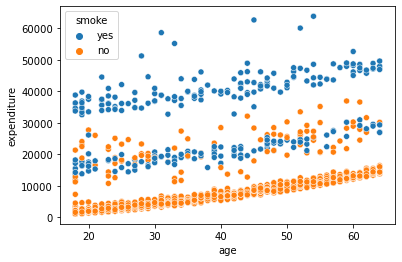

In [24]:
sns.scatterplot(data=health,x='age',y='expenditure',hue='smoke')

**18. Draw distribution plot of expenditure**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


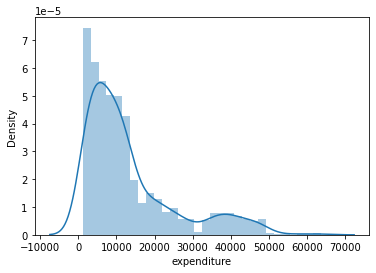

In [26]:
sns.distplot(health['expenditure'])


plt.show()

**19. Display the pairplot**

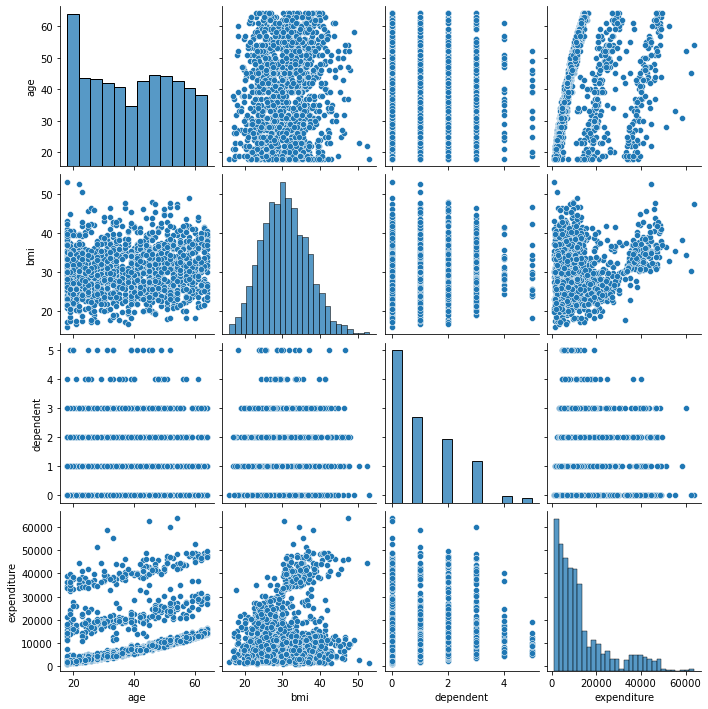

In [37]:
sns.pairplot(health)

**20. Display heatmap for the data**

In [28]:
corr_matrix = health.corr()
corr_matrix

,age,bmi,dependent,expenditure
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
dependent,0.042469,0.012759,1.000000,0.067998
expenditure,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

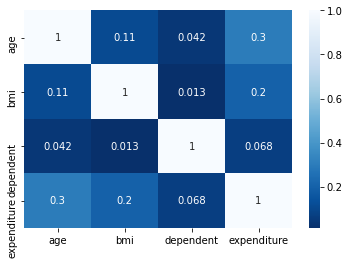

In [34]:
corr = health.corr()
sns.heatmap(corr,annot=True,cmap='Blues_r')